In [2]:
!pip3 install num2words

!pip3 install autocorrect

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=c4ef0aacaba4db66d578daa63aa7bf4049bd37355462f5ed0b8c18165269b00b
  Stored in directory: /Users/rajesh/Library/Caches/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 4.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=d8a8e8d588990d94d747ce7bae890eccfa9ec74910c46f7d5348e1d4d5dff804
  Stored in directory: /Users/rajesh/Library/Caches/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d65

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import num2words

from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk import word_tokenize

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/rajesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rajesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/MyDrive/')

Mounted at /content/drive


In [5]:
df = pd.read_csv('TA_restaurants_curated.csv')

In [6]:
df.head(10)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
5,5,Ciel Bleu Restaurant,Amsterdam,"['Contemporary', 'International', 'Vegetarian ...",6.0,4.5,$$$$,745.0,"[['A treat!', 'Wow just Wow'], ['01/01/2018', ...",/Restaurant_Review-g188590-d696902-Reviews-Cie...,d696902
6,6,Zaza's,Amsterdam,"['French', 'International', 'Mediterranean', '...",7.0,4.5,$$ - $$$,1455.0,"[['40th Birthday with my Family', 'One of the ...",/Restaurant_Review-g188590-d1014732-Reviews-Za...,d1014732
7,7,Blue Pepper Restaurant And Candlelight Cruises,Amsterdam,"['Asian', 'Indonesian', 'Vegetarian Friendly',...",8.0,4.5,$$$$,675.0,"[['Great Experience', 'A true delight'], ['01/...",/Restaurant_Review-g188590-d697058-Reviews-Blu...,d697058
8,8,Teppanyaki Restaurant Sazanka,Amsterdam,"['Japanese', 'Asian', 'Vegetarian Friendly', '...",9.0,4.5,$$$$,923.0,"[['Great Food & Service!', 'Superior food and ...",/Restaurant_Review-g188590-d697009-Reviews-Tep...,d697009
9,9,Rob Wigboldus Vishandel,Amsterdam,"['Dutch', 'Seafood', 'Fast Food']",10.0,4.5,$,450.0,"[['Excellent Herring', 'Lovely, rustic fish sh...",/Restaurant_Review-g188590-d1955652-Reviews-Ro...,d1955652


# Exploratory Data Analysis  
Analyze:
1. From where it was collected
2. Characteristics of data
3. Learn about individual columns
4. Any hidden patterns- Visualization

In [8]:
df.shape

(125527, 11)

In [9]:
df.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


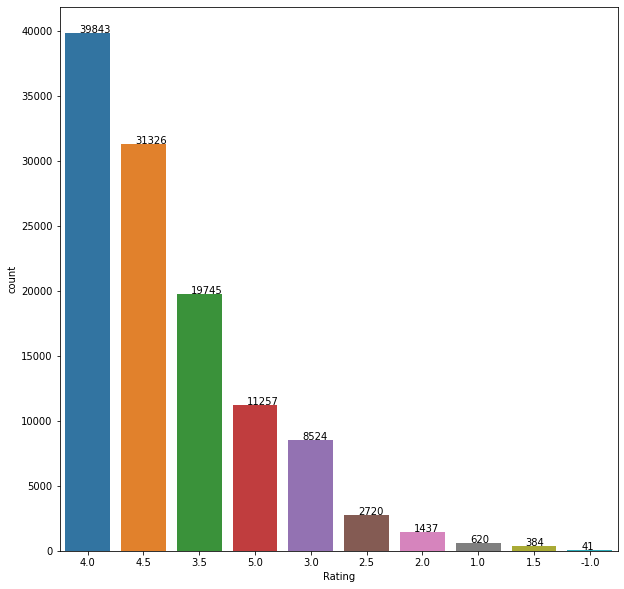

In [10]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df["Rating"],  data = df, order = df["Rating"].value_counts().index )

for p, label in zip(ax.patches, df["Rating"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [11]:
df.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [12]:
# Numerical Columns
df.select_dtypes(include='number').nunique()

Unnamed: 0           18212
Ranking              16442
Rating                  10
Number of Reviews     2079
dtype: int64

In [13]:
# Categorical Columns
df.select_dtypes(exclude='number').nunique()

Name             111927
City                 31
Cuisine Style     20971
Price Range           3
Reviews           96696
URL_TA           125326
ID_TA            125326
dtype: int64

In [14]:
# Missing values - percentage
missing_data = pd.DataFrame({'total_missing':df.isnull().sum(), 'percentage_missing': (df.isnull().sum()/df.shape[0])*100})
missing_data

,total_missing,percentage_missing
Unnamed: 0,0,0.000000
Name,0,0.000000
City,0,0.000000
Cuisine Style,31351,24.975503
Ranking,9651,7.688386
Rating,9630,7.671656
Price Range,47855,38.123272
Number of Reviews,17344,13.816948
Reviews,9616,7.660503
URL_TA,0,0.000000


### Pre Processing

In [15]:
# Remove Price Range as we do not know in which pattern it represents our data
# URL and ID numbers not related to our project
print(df.shape)
df.drop(['URL_TA','ID_TA','Price Range'],axis=1,inplace = True)
print(df.shape)

(125527, 11)
(125527, 8)


In [16]:
# Delete First unnamed column
df.drop(df.columns[0],axis=1,inplace=True)
print(df.shape)

(125527, 7)


In [17]:
# Count all rows that have null values in all 6 columns after Name Column
# as 'Name' column is not empty
al = df[(df.isna().sum(axis=1) == 5)].index
print(df.shape)
len(al)

(125527, 7)


4466

In [18]:
# Removing all rows fetched above  
df.drop(df.index[al],inplace=True)
print(df.shape)

(121061, 7)


In [19]:
# Change data type of 'Rating' 'Ranking' and 'Number of Reviews' column
df.Rating = df.Rating.astype(float)
df.Ranking = df.Ranking.astype(float)
df['Number of Reviews'] = df['Number of Reviews'].astype(float)

In [20]:
# Group by data using Rating column
df.groupby(['Rating']).count()

,Name,City,Cuisine Style,Ranking,Number of Reviews,Reviews
Rating,,,,,,
-1.0,41,41,36,0,5,40
1.0,620,620,305,620,149,620
1.5,384,384,222,383,384,384
2.0,1437,1437,826,1433,1025,1437
2.5,2720,2720,1733,2720,2720,2720
3.0,8524,8524,5679,8515,7464,8523
3.5,19745,19745,15634,19744,19744,19745
4.0,39843,39843,32247,39805,37329,39843
4.5,31326,31326,25344,31325,31326,31326


Conclusion- as Rating column also have sum Null values that is not included in the above statement - because sum of first column(that don't have any Null Values) = Number of rows after removing all rows with Nan in Rating

### Plots

<AxesSubplot:xlabel='Rating', ylabel='Number of Reviews'>

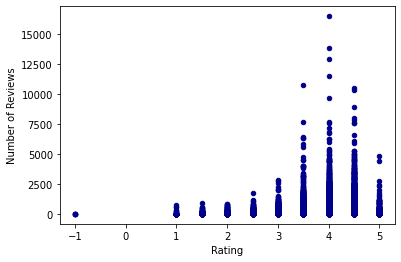

In [21]:
df.plot.scatter(x='Rating', y='Number of Reviews', c='DarkBlue')

<AxesSubplot:xlabel='Rating', ylabel='Ranking'>

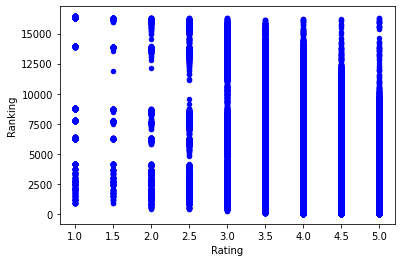

In [22]:
df.plot.scatter(x='Rating', y='Ranking', c='Blue')

Conclusion- No biasness in rating 
Low rank hotels also have 5 star rating

<AxesSubplot:xlabel='Ranking', ylabel='Number of Reviews'>

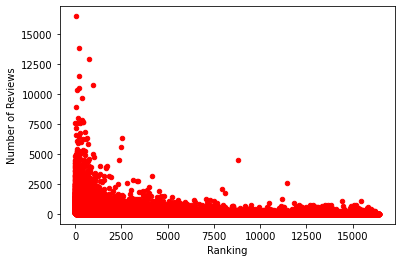

In [23]:
df.plot.scatter(x='Ranking', y='Number of Reviews', c='red')

Conclusion- if ranking of restaurant high more people prefer going their according to review count

<AxesSubplot:xlabel='Ranking', ylabel='Number of Reviews'>

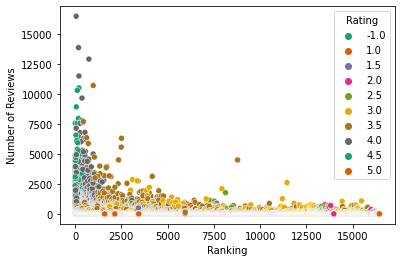

In [24]:
a= pd.DataFrame()
a = df.copy()
a.Rating = a.Rating.astype(float)
a.Ranking = a.Ranking.astype(float)
a['Number of Reviews'] = a['Number of Reviews'].astype(float)

sns.scatterplot(x=a.Ranking, y=a['Number of Reviews'], hue=a['Rating'], palette="Dark2")

<AxesSubplot:xlabel='Ranking', ylabel='Number of Reviews'>

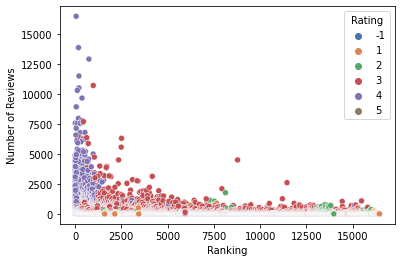

In [25]:
# NaN values dropped and Rating converted to int
a= pd.DataFrame()
a = df.copy()
a.dropna(subset=['Rating'], inplace=True)

# Convert Rating column to integer so that we are only left with 0,1,2,3,4,5
a.Rating = a.Rating.astype(int)
a.Ranking = a.Ranking.astype(float)
a['Number of Reviews'] = a['Number of Reviews'].astype(float)

sns.scatterplot(x=a.Ranking, y=a['Number of Reviews'], hue=a['Rating'], palette="deep")

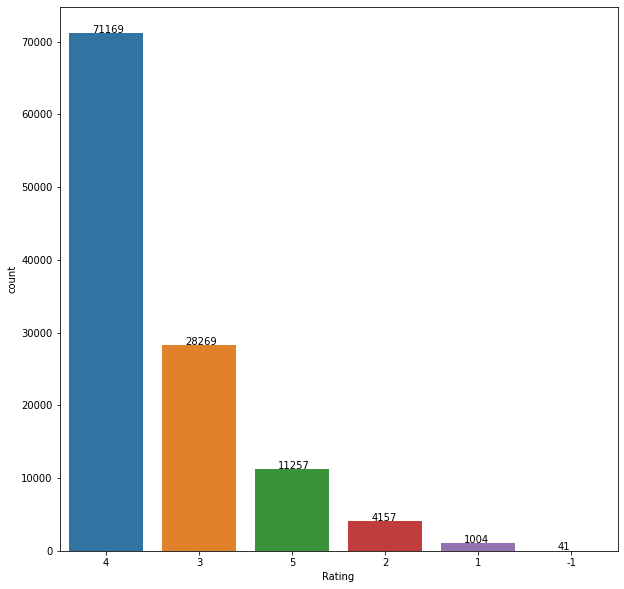

In [26]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=a["Rating"],  data=a, order = a["Rating"].value_counts().index )

for p, label in zip(ax.patches, a["Rating"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

Plot seperate scatter plot to each Rating

<AxesSubplot:title={'center':'Ranking = 5'}, xlabel='Ranking', ylabel='Number of Reviews'>

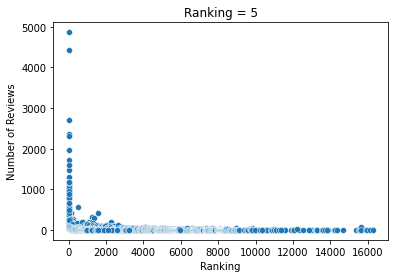

In [27]:
a5 = a.loc[df['Rating'] == 5]
plt.title('Ranking = 5')
sns.scatterplot(x=a5.Ranking, y=a5['Number of Reviews'], palette="deep")

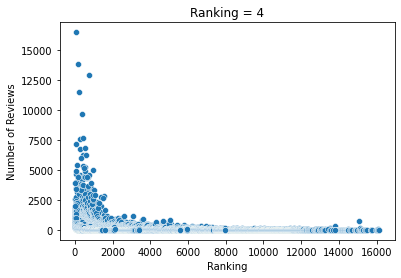

In [ ]:
a4 = a.loc[df['Rating'] == 4]
plt.title('Ranking = 4')
sns.scatterplot(x=a4.Ranking, y=a4['Number of Reviews'], palette="deep")

<AxesSubplot:title={'center':'Ranking = 3'}, xlabel='Ranking', ylabel='Number of Reviews'>

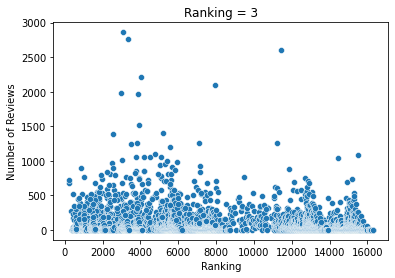

In [31]:
a3 = a.loc[df['Rating'] == 3]
plt.title('Ranking = 3')
sns.scatterplot(x=a3.Ranking, y=a3['Number of Reviews'])

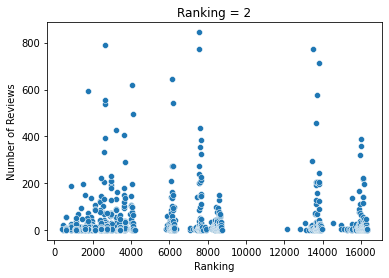

In [ ]:
a2 = a.loc[df['Rating'] == 2]
plt.title('Ranking = 2')
sns.scatterplot(x=a2.Ranking, y=a2['Number of Reviews'], palette="deep")

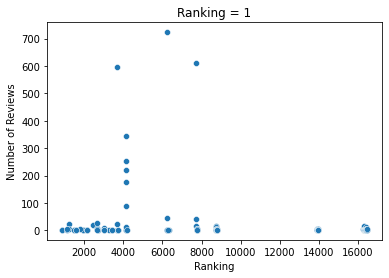

In [ ]:
a1 = a.loc[df['Rating'] == 1]
plt.title('Ranking = 1')
sns.scatterplot(x=a1.Ranking, y=a1['Number of Reviews'], palette="deep")

In [32]:
a0 = a.loc[df['Rating'] == 0]
plt.title('Ranking = 0')
sns.scatterplot(x=a0.Ranking, y=a0['Number of Reviews'], palette="deep")

Conclusion- When Rating=0 Number of reviews and Ranking are NaN mostly. Remove the row with Rating = 0

Conclusion- Have to remove all rows where Rating = 0 as we are classifing the comment as poisitive or negative accorsing to the Rating 

### WordCloud

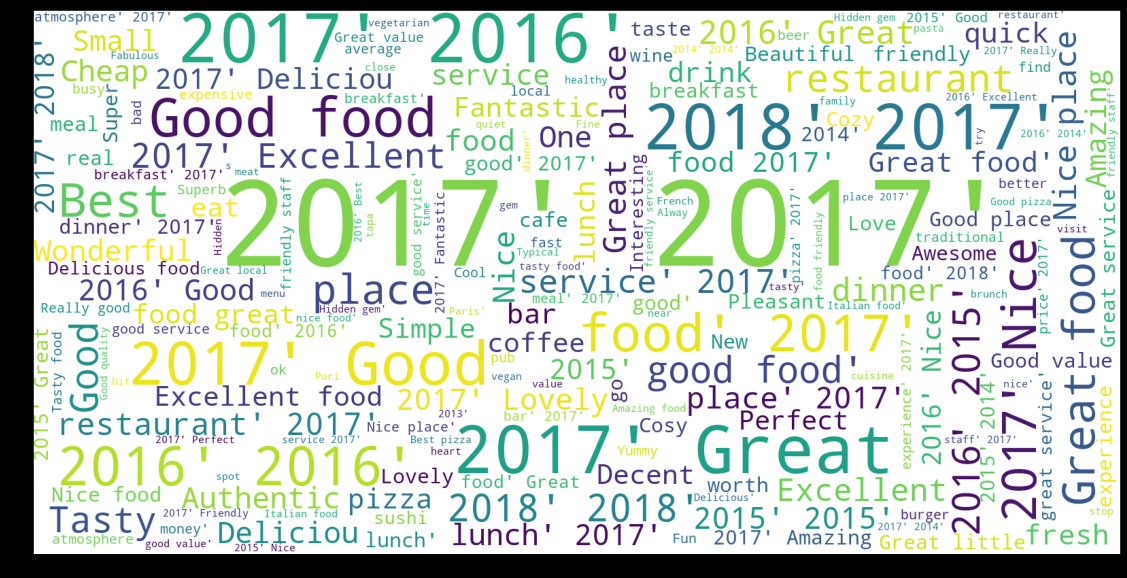

In [28]:
# Good Rating
mask = (df["Rating"] == 4) | (df["Rating"] == 5)
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].astype(str).tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

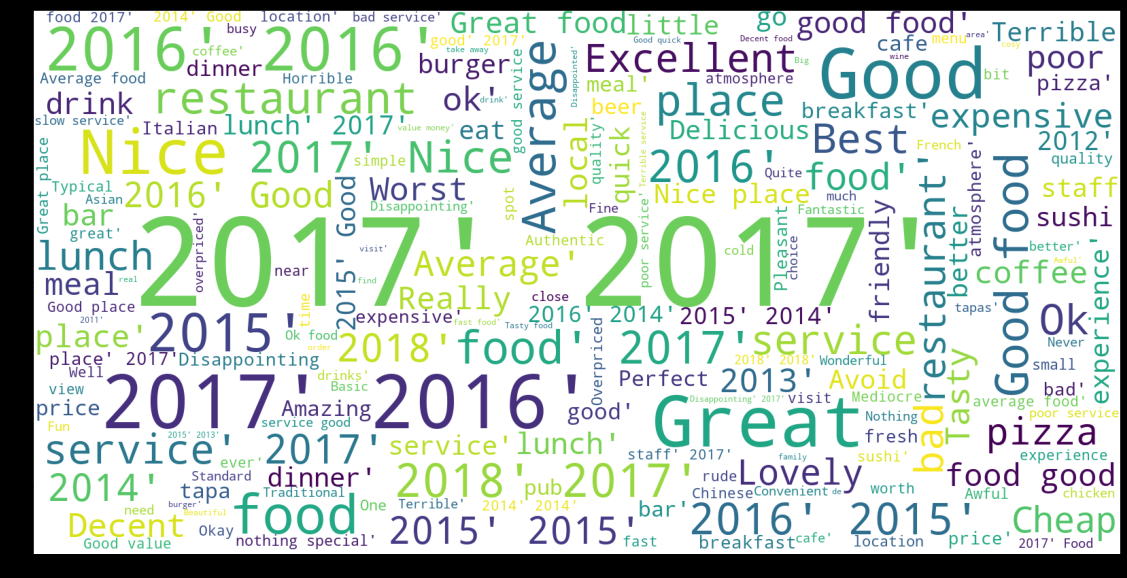

In [ ]:
# Neutral Rating
mask = (df["Rating"] == 3) 
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].astype(str).tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

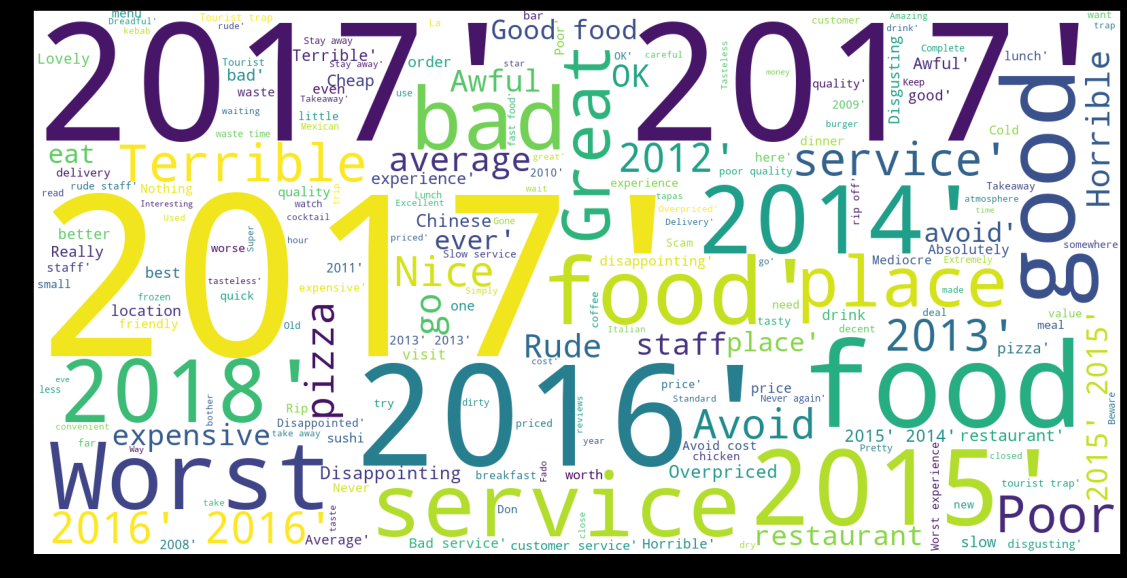

In [ ]:
# Bad Rating
mask = (df["Rating"] == 1) | (df["Rating"] == 2)
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Text Pre-Processing

In [ ]:
# Remove 
print(df.shape)
df.Rating = df.Rating.replace(-1, np.nan)

df.dropna(subset=['Rating'], inplace=True)

#df.Rating = df.Rating.astype(float)
print(df.shape)

(121061, 7)
(115856, 7)


How to determine positive or negative comments



1 - Very Negative  
2 - Negative  
3 - Neutral  
4 - Positive  
5 - Very Positive  

Pre Processing:
1. Tokenization
2. Stemiming
3. Normalization
4. Lemmatization
5. Stop Words
6. Noise Removal- number to text

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
df.Reviews

0         [['Just like home', 'A Warm Welcome to Wintry ...
1         [['Great food and staff', 'just perfect'], ['0...
2         [['Satisfaction', 'Delicious old school restau...
3         [['True five star dinner', 'A superb evening o...
4         [['Best meal.... EVER', 'super food experience...
                                ...                        
125450                                             [[], []]
125451    [['Poor quality, small portions, miserable st....
125452                                             [[], []]
125453                                             [[], []]
125454                                             [[], []]
Name: Reviews, Length: 115856, dtype: object

In [ ]:
class pre_pro():   
    def lowerCase(self,df,col):
      print("lowercasing"+col)
      df=df.dropna()
      df[col]=df[col].str.lower()
      print(df[col])
      return df

    def processReviews(self,df, col):
      print("processing"+col)
      f = lambda df: df[col].split("]")[0].strip('[').strip('"').strip(',')
      df[col] = df.apply(f, axis=1)
      print("stripped square brackets removing appos")
      df[col]=df[col].apply(lambda x: [appos[word] if word in appos else word for word in x.split()])
      print("removing extra quotes")
      df[col]=df[col].apply(lambda x: [item.replace("'","") for item in x ])
      print(df[col])
      return df
  
    def stopwordRemoval(self,df,col):
      print("removing stopwords")
      stop_words = stopwords.words('english')
      print(stop_words)
      df[col]=df[col].apply(lambda x: [item for item in x if item not in stop_words])
      print(df[col])
      return df
  
    def nonalpha_removal(self,lower_df):
      # not implemented as it also remove emojis
      pass

    def lemmatizeText(self,df,col):
        print("lemmatizing")
        lemmatizer = WordNetLemmatizer()
        df[col]=df[col].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
        print(df[col])
        return df
        
    def joinReviews(self, df, col):
      df[col]=df[col].apply(lambda x: [' '.join(x)])
      df[col]=df[col].apply(lambda x: [item.replace(",","") for item in x ])
      df[col]=df[col].apply(lambda x: [item.replace(".","") for item in x ])
      df[col]=df[col].apply(lambda x: ''.join(x))
      df[col]=df[col].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
      return df
      
    def num_to_words( self,df, col):
      df[col]=df[col].apply(lambda x: [num2words(item) if item.isdigit() else item for item in x ])
      return df

    def spell_autocorrect(self, df, col):
      correct_spell_words = []
      spell_corrector = Speller(lang='en')
      df[col]=df[col].apply(lambda x: [item for item in x ])
      return df

In [ ]:
p = pre_pro()
df = p.lowerCase(df,'Reviews')
#df.Rating = df.Rating.astype(float)
df = p.processReviews(df,'Reviews')
df = p.stopwordRemoval(df,'Reviews')
df = p.lemmatizeText(df,'Reviews')
df = p.spell_autocorrect(df,'Reviews')
df = p.num_to_words(df,'Reviews')
df = p.joinReviews(df,'Reviews')
print(df.shape)

lowercasingReviews
0         [['just like home', 'a warm welcome to wintry ...
1         [['great food and staff', 'just perfect'], ['0...
2         [['satisfaction', 'delicious old school restau...
3         [['true five star dinner', 'a superb evening o...
4         [['best meal.... ever', 'super food experience...
                                ...                        
125441                     [['very basic'], ['05/11/2016']]
125443                   [['good service'], ['12/15/2015']]
125445    [['super local eatery', 'small and charming pl...
125448    [["don't waste your time, go somewhere else!",...
125452                                             [[], []]
Name: Reviews, Length: 85486, dtype: object
processingReviews
stripped square brackets removing appos
removing extra quotes
0         [just, like, home,, a, warm, welcome, to, wint...
1                 [great, food, and, staff,, just, perfect]
2         [satisfaction,, delicious, old, school, restau...
3         [true, 

In [ ]:
#ndf.reset_index(drop=True)
#c = ndf.index

### WordCloud after Text pre-processing

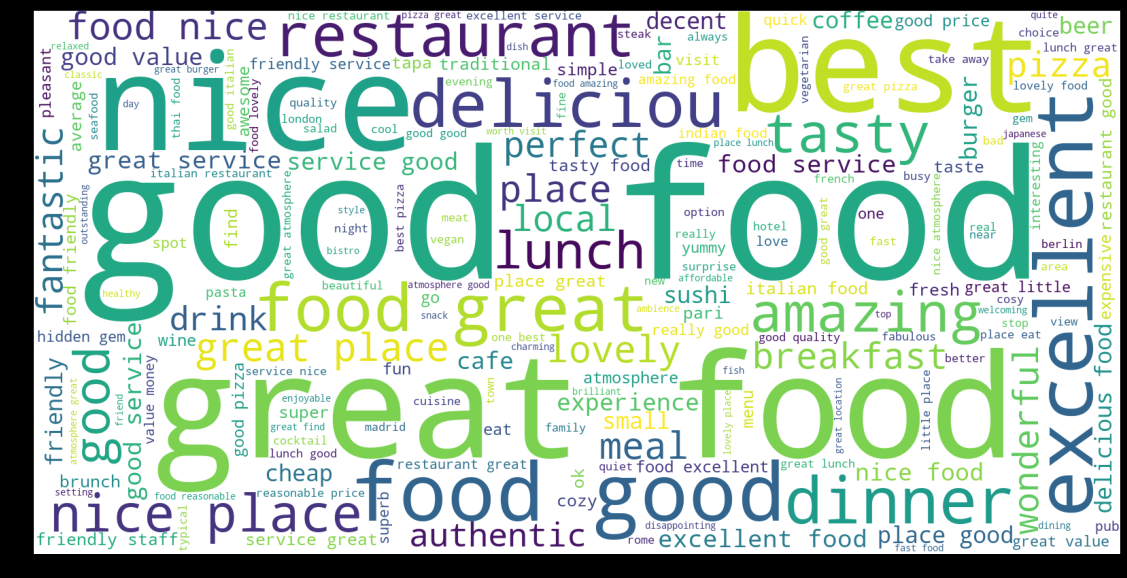

In [ ]:
# Good Rating
mask = (df["Rating"] == 4) | (df["Rating"] == 5)
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].astype(str).tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

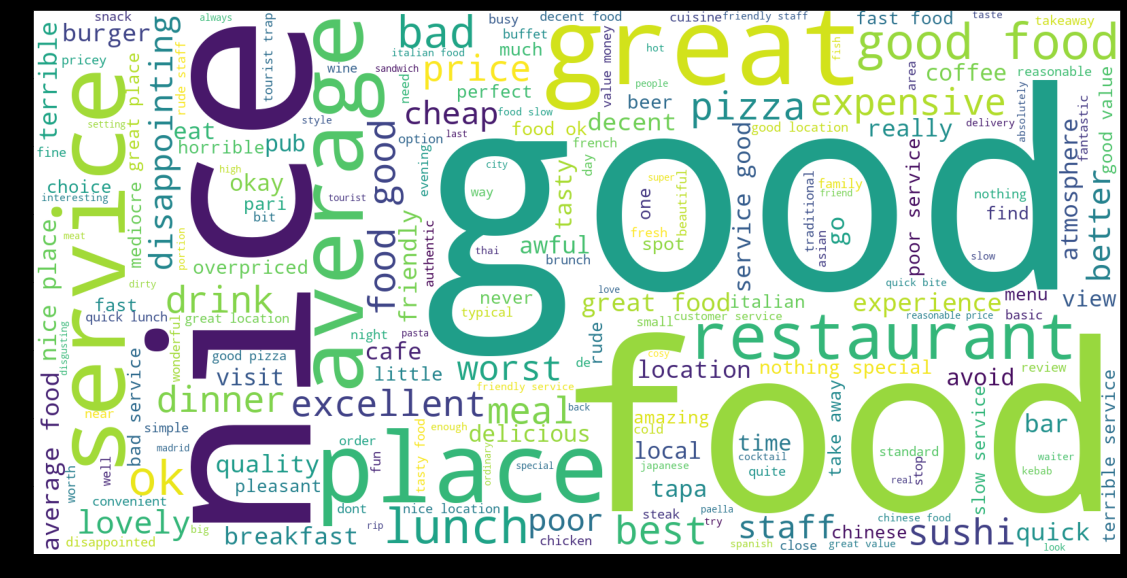

In [ ]:
# Neutral Rating
mask = (df["Rating"] == 3) 
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].astype(str).tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

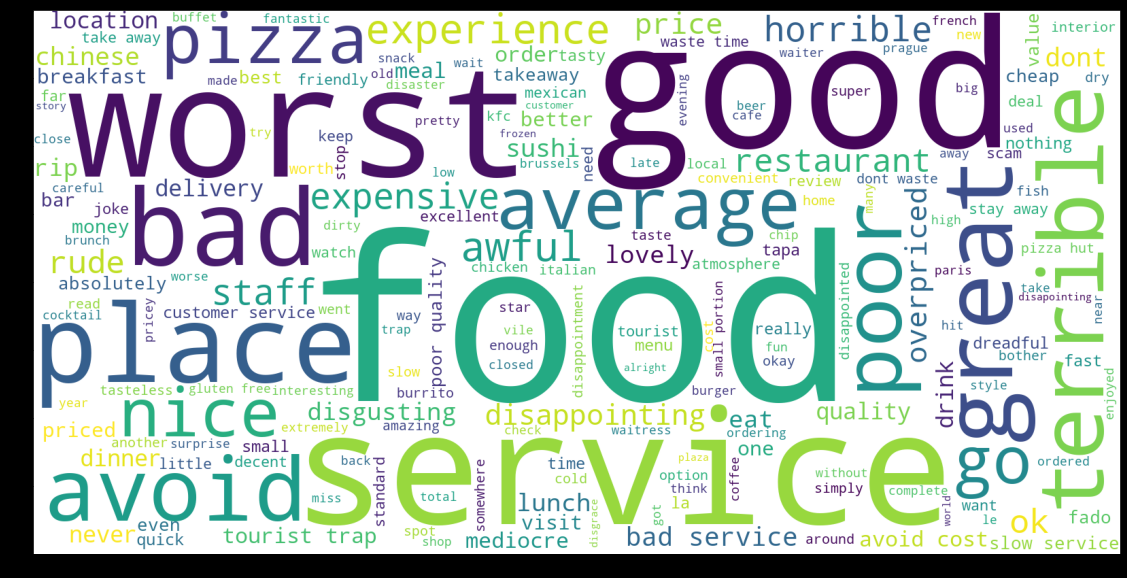

In [ ]:
# Bad Rating
mask = (df["Rating"] == 1) | (df["Rating"] == 2)
df_low = df[mask]

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_low['Reviews'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
#EMOJI HANDLING

# Tokenize and remove puncturaions
#tokenizer = nltk.RegexpTokenizer(r"\w+")
#a = []
#for i in range(df.shape[0]):
#  try:
#    ndf['Reviews'][i] = tokenizer.tokenize(ndf['Reviews'][i])
#  except:
#    a.append(i)
#  print(i)
#ndf

In [ ]:
#ndf.drop(index=a,inplace=True)
df.Rating = df.Rating.astype(int)
aa = df[df['Reviews'].isnull()].index.tolist()
print(len(aa))
df.drop(index=aa,inplace=True)

0


In [ ]:
scaler = StandardScaler()

### Feature engineering

#### BOW

In [33]:
cv = CountVectorizer(max_features = 1500)
X_b = cv.fit_transform(df["Reviews"]).toarray()

y = df.Rating.values
X_b

In [ ]:
pca = PCA(n_components=0.80)
X_bo = pca.fit_transform(X_b)
X_train, X_test, y_train, y_test = train_test_split(X_bo, y, test_size=0.30, random_state=42)

**Random Forest**

In [ ]:
## Random Forest
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)

# model accuracy for X_test  
accuracy = text_classifier.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.19      0.01      0.02       302
           2       0.17      0.01      0.02      1257
           3       0.49      0.14      0.22      8530
           4       0.63      0.95      0.76     21308
           5       0.25      0.02      0.03      3360

    accuracy                           0.62     34757
   macro avg       0.35      0.23      0.21     34757
weighted avg       0.54      0.62      0.52     34757



Acc 0.6203642431740369
Recall 0.22664798473192055


**Naive Bayes**

In [ ]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.03      0.77      0.05       302
           2       0.07      0.16      0.10      1257
           3       0.34      0.20      0.25      8530
           4       0.72      0.33      0.45     21308
           5       0.11      0.27      0.16      3360

    accuracy                           0.29     34757
   macro avg       0.25      0.35      0.20     34757
weighted avg       0.54      0.29      0.36     34757



Acc 0.29087665793940787
Recall 0.3474991908698688


**Decision Tree (DT)**

In [ ]:
## Decision Tree (DT)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.05      0.03      0.04       302
           2       0.06      0.04      0.05      1257
           3       0.32      0.28      0.30      8530
           4       0.62      0.70      0.66     21308
           5       0.12      0.09      0.10      3360

    accuracy                           0.51     34757
   macro avg       0.24      0.23      0.23     34757
weighted avg       0.47      0.51      0.49     34757



Acc 0.5057398509652732
Recall 0.22657359055757534


**SVM**

In [ ]:
# Support Vector machine (SVM)
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       672
           3       0.54      0.16      0.25      6240
           4       0.69      0.96      0.80     16967
           5       0.00      0.00      0.00      1665

    accuracy                           0.68     25646
   macro avg       0.25      0.23      0.21     25646
weighted avg       0.59      0.68      0.59     25646



Acc 0.6768306948452
Recall 0.22503475071518922


In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 10)
from sklearn.neighbors import KNeighborsClassifier

# We can create Python dictionary using [] or dict()
scores = []
f = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    f.append(metrics.f1_score(y_test, y_pred, average='macro'))

print(scores)

#### TF-IDF

In [ ]:
tfidfconverter = TfidfVectorizer(max_features=1500)  
tf_ndf = tfidfconverter.fit_transform(df["Reviews"]).toarray()
tf_df = pd.DataFrame(tf_ndf, columns = tfidfconverter.get_feature_names())
tf_df.columns = ["word_" + str(x) for x in tf_df.columns]
tf_df.index = df.index

In [ ]:
tf_df = scaler.fit_transform(tf_df)

In [ ]:
pca = PCA(n_components = 0.80)
pca.fit(tf_df)
print(pca.n_components_)
X_tf = pca.transform(tf_df)
y = df.Rating.values
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.30, random_state=42)

1109


**Random Forest**

In [ ]:
## Random Forest
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)
# model accuracy for X_test  
accuracy = text_classifier.score(X_test, y_test)
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.12      0.01      0.01       302
           2       0.13      0.01      0.01      1257
           3       0.44      0.10      0.17      8530
           4       0.63      0.96      0.76     21308
           5       0.26      0.02      0.03      3360

    accuracy                           0.61     34757
   macro avg       0.32      0.22      0.20     34757
weighted avg       0.52      0.61      0.51     34757



Acc 0.6136893287683056
Recall 0.21784268347594


**Naive Bayes**

In [ ]:
## Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.02      0.12      0.04       302
           2       0.06      0.04      0.05      1257
           3       0.33      0.19      0.24      8530
           4       0.68      0.26      0.38     21308
           5       0.12      0.70      0.21      3360

    accuracy                           0.28     34757
   macro avg       0.24      0.26      0.18     34757
weighted avg       0.51      0.28      0.31     34757



Acc 0.277756998590212
Recall 0.26258002031473293


**Decision Tree (DT)**

In [ ]:
## Decision Tree (DT)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.03      0.02      0.02       302
           2       0.07      0.06      0.06      1257
           3       0.30      0.27      0.28      8530
           4       0.62      0.69      0.66     21308
           5       0.11      0.07      0.09      3360

    accuracy                           0.50     34757
   macro avg       0.23      0.22      0.22     34757
weighted avg       0.47      0.50      0.48     34757



Acc 0.4997266737635584
Recall 0.22130904032353835


**SVM**

In [ ]:
# Support Vector machine (SVM)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 10)
from sklearn.neighbors import KNeighborsClassifier

# We can create Python dictionary using [] or dict()
scores = []
f = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    f.append(metrics.f1_score(y_test, y_pred, average='macro'))

print(scores)

#### Word2Vec

In [ ]:
dats = []
c=0
for i in df.Reviews:
  print(c)
  c = c+1
  words = nltk.word_tokenize(i) # TOKENIZE
  new_words= [word for word in words if word.isalnum()] # PUNCTUATION
  i = new_words
  dats.append(i)

In [ ]:
model = Word2Vec(dats, min_count=3,window = 5)
words = model.wv.vocab
print('Vocabulary size: %d' % len(words))

Vocabulary size: 7154


In [ ]:
def vectorize(list_of_docs, model):
    features = []
    # corpus loop for sentences
    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        # sentence loop for tokens
        for token in tokens:
            if token in model.wv:
              vectors.append(model.wv[token])

        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(dats, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(115856, 100)

**Scaler fit**

In [ ]:
wo = scaler.fit_transform(vectorized_docs)

In [ ]:
pca = PCA(n_components=0.80)
pca.fit(wo)
print(pca.n_components_)
X_Wo = pca.transform(wo)
y = df.Rating.values
X_train, X_test, y_train, y_test = train_test_split(X_Wo, y, test_size=0.30, random_state=42)

11


**Random Forest**

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
y_pred = text_classifier.predict(X_test)

# model accuracy for X_test  
accuracy = text_classifier.score(X_test, y_test)
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.17      0.01      0.02       302
           2       0.21      0.01      0.02      1257
           3       0.48      0.17      0.25      8530
           4       0.64      0.94      0.76     21308
           5       0.29      0.02      0.04      3360

    accuracy                           0.62     34757
   macro avg       0.36      0.23      0.22     34757
weighted avg       0.55      0.62      0.53     34757



Acc 0.6209396668297034
Recall 0.23138151391263237


**Naive Bayes**

In [ ]:
## Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.09      0.02      0.03       302
           2       0.10      0.00      0.01      1257
           3       0.51      0.12      0.20      8530
           4       0.63      0.96      0.76     21308
           5       0.29      0.01      0.02      3360

    accuracy                           0.62     34757
   macro avg       0.33      0.22      0.20     34757
weighted avg       0.54      0.62      0.52     34757



Acc 0.6217740311304197
Recall 0.22401410567985747


**Decision Tree (DT)**

In [ ]:
## Decision Tree (DT)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           1       0.05      0.02      0.03       302
           2       0.09      0.06      0.07      1257
           3       0.32      0.27      0.29      8530
           4       0.63      0.71      0.67     21308
           5       0.14      0.09      0.11      3360

    accuracy                           0.51     34757
   macro avg       0.24      0.23      0.24     34757
weighted avg       0.48      0.51      0.49     34757



Acc 0.5131052737578042
Recall 0.23255828153802144


In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 10)
from sklearn.neighbors import KNeighborsClassifier

# We can create Python dictionary using [] or dict()
scores = []
f = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    f.append(metrics.f1_score(y_test, y_pred, average='macro'))

print(scores)

**SVM**

In [ ]:
# Support Vector machine (SVM)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print('\n')
print('Acc',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred, average='macro'))

#### N GRAM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
def get_topk_ngram(df, ngram_range=(1,1), k=None, stopwords=True, with_count=False):
    '''
    Extract the most frequently occurred words in countvector
    '''
    if stopwords:
        temp = []
        for name in df.Name.unique():
            for token in name.split():
                if len(token) > 1:
                    temp.append(token)
        my_stop_words = ENGLISH_STOP_WORDS.union(temp)
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=my_stop_words, max_features=1500)
        
    else:
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=None, max_features=k)
        
    countvector = vectorizer.fit_transform(df['Reviews'])
    transformed= countvector.toarray()
    # Get topk occurred ngrams
    topk_words = []
    sortedindices = countvector.toarray().sum(axis=0).argsort()[::-1][:k]
    counts = countvector.toarray().sum(axis=0)
    #print(counts)
    
    for i in sortedindices:
        word = vectorizer.get_feature_names()[i]
        
        if with_count:
            count = counts[i]
            topk_words.append((word, count))
        else:
            topk_words.append(word)
            
    return topk_words,transformed,vectorizer

In [ ]:
topkPos = get_topk_ngram(ndf.sort_values("pos", ascending = False), ngram_range=(1,1), k=1500, with_count=True)
topkNeg = get_topk_ngram(ndf.sort_values("neg", ascending = False), ngram_range=(1,1), k=1500, with_count=True)
topkPos_bigram = get_topk_ngram(ndf.sort_values("pos", ascending = False), ngram_range=(2,2), k=1500, with_count=True)
topkNeg_bigram = get_topk_ngram(ndf.sort_values("neg", ascending = False), ngram_range=(2,2), k=1500, with_count=True)
topkPos,topkNeg,topkPos_bigram,topkNeg_bigram

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram,Y, test_size=0.30, random_state=42)

Naive Bayes

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)
report=classification_report(y_test, y_pred)
print("Naive Bayes N-gram")
print(report)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print('F1',f1_score(y_test,y_pred,average='macro'))
print('Recall',recall_score(y_test, y_pred, average='macro'))

Naive Bayes N-gram
              precision    recall  f1-score   support

           1       0.01      0.90      0.01       102
           2       0.04      0.07      0.05       672
           3       0.34      0.10      0.16      6240
           4       0.74      0.14      0.24     16967
           5       0.07      0.05      0.06      1665

    accuracy                           0.13     25646
   macro avg       0.24      0.25      0.10     25646
weighted avg       0.57      0.13      0.20     25646

Accuracy: 0.1282851126881385
F1 0.10364878996954892
Recall 0.2534400555553512


Decision Tree

In [ ]:
# Create Decision Tree classifer object
clfDesc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clfDesc = clfDesc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clfDesc.predict(X_test)
reportDesc=classification_report(y_test, y_pred)
print("Decision Tree N-gram")
print(reportDesc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print('F1',f1_score(y_test,y_pred,average='macro'))
print('Recall',recall_score(y_test, y_pred, average='macro'))

Decision Tree N-gram
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       672
           3       0.45      0.03      0.06      6240
           4       0.67      0.99      0.80     16967
           5       0.00      0.00      0.00      1665

    accuracy                           0.66     25646
   macro avg       0.22      0.20      0.17     25646
weighted avg       0.55      0.66      0.54     25646

Accuracy: 0.6615846525774
F1 0.17167538983622316
Recall 0.20429590320879293


Random Forest

In [ ]:
clfRandom = RandomForestClassifier(max_depth=2, random_state=0)
clfRandom.fit(X_train,y_train)
y_pred = clfRandom.predict(X_test)
reportDesc=classification_report(y_test, y_pred)
print("RandomForestClassifier N-gram")
print(reportDesc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print('F1',f1_score(y_test,y_pred,average='macro'))
print('Recall',recall_score(y_test, y_pred, average='macro'))

RandomForestClassifier N-gram
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       672
           3       0.00      0.00      0.00      6240
           4       0.66      1.00      0.80     16967
           5       0.00      0.00      0.00      1665

    accuracy                           0.66     25646
   macro avg       0.13      0.20      0.16     25646
weighted avg       0.44      0.66      0.53     25646

Accuracy: 0.6615846525774
F1 0.15926595170487878
Recall 0.2


SVM

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report=classification_report(y_test, y_pred)
print("SVM N-gram")
print(report)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))
print('F1',f1_score(y_test,y_pred,average='macro'))
print('Recall',recall_score(y_test, y_pred, average='macro'))

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print('F1',f1_score(y_test,y_pred,average='macro'))
print('Recall',recall_score(y_test, y_pred, average='macro'))
reportDesc=classification_report(y_test, y_pred)
print(reportDesc)

Accuracy: 0.5972081416205256
F1 0.23150562274268052
Recall 0.23273629978363908
              precision    recall  f1-score   support

           1       0.08      0.02      0.03       102
           2       0.10      0.03      0.04       672
           3       0.31      0.32      0.32      6240
           4       0.70      0.78      0.74     16967
           5       0.15      0.02      0.03      1665

    accuracy                           0.60     25646
   macro avg       0.27      0.23      0.23     25646
weighted avg       0.55      0.60      0.57     25646



In [34]:
ax = sns.barplot(
        data=df,
        y=[65.3,66,66,12.8,66],
        x=['Ngram','tf','bow'],
        hue=['KNN','DT','SVM','NB','RF'],
        palette=['blue', 'red', 'yellow', 'grey','green'],
        saturation=0.6,
    )

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(8, 8))
 
# set height of bar


naive = [0.20,0.103,0.18,0.20]
dt = [0.23,0.17,0.22,0.24]
knn = [0.23,0.23,0.23,0.23]
svm = [0.21,0.182,0.21,0.15]
rf = [0.21,0.159,0.20,0.22]

# Set position of bar on X axis
br1 = np.arange(len(naive))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, naive, color ='r', width = barWidth,
        edgecolor ='grey', label ='Naive')
plt.bar(br2, dt, color ='g', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, knn, color ='b', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, svm, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br5, rf, color ='pink', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
 
# Adding Xticks
plt.xlabel('Extraction Technique', fontweight ='bold', fontsize = 15)
plt.ylabel('F1', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(naive))],
        da,fontsize = 12)
 
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(8, 8))
 
# set height of bar


naive = [0.35,0.25,0.26,0.22]
dt = [0.23,0.20,0.22,0.23]
knn = [0.23,0.214,0.23,0.23]
svm = [0.23,0.209,0.23,0.20]
rf = [0.23,0.20,0.22,0.23]


# Set position of bar on X axis
br1 = np.arange(len(naive))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, naive, color ='r', width = barWidth,
        edgecolor ='grey', label ='Naive')
plt.bar(br2, dt, color ='g', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, knn, color ='b', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, svm, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br5, rf, color ='pink', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
 
# Adding Xticks
plt.xlabel('Extraction Technique', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(naive))],
        da,fontsize = 12)
 
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(8, 8))
 
# set height of bar


naive = [0.25,0.24,0.24,0.33]
dt = [0.24,0.56,0.23,0.24]
knn = [0.28,0.34,0.26,0.29]
svm = [0.24,0.48,0.24,0.12]
rf = [0.35,0.66,0.32,0.36]


# Set position of bar on X axis
br1 = np.arange(len(naive))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, naive, color ='r', width = barWidth,
        edgecolor ='grey', label ='Naive')
plt.bar(br2, dt, color ='g', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')
plt.bar(br3, knn, color ='b', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, svm, color ='y', width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br5, rf, color ='pink', width = barWidth,
        edgecolor ='grey', label ='Random Forest')
 
# Adding Xticks
plt.xlabel('Extraction Technique', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(naive))],
        da,fontsize = 12)
 
plt.legend()
plt.show()

Resources:  
